# changing_inputs

This Notebook loads an input file, changes the inputs and for each change runs the sap2012 model.

## Setup

In [1]:
%matplotlib inline
import sap2012
import matplotlib.pyplot as plt
s=sap2012.Sap2012()

## Read input file

In [2]:
fp='input_csv_file.csv'
s.read_input_csv(fp)

## Change input and run model

The original `area` input value is:

In [9]:
s.inputs['assumed_occupancy']

3

Here this is changed to the three possible options below:

In [10]:
assumed_occupancy=[1,2,3,4,5]

For each area, the SAP model is run and the results stored in the `outputs` dictionary:

In [11]:
outputs={}
for i,a in enumerate(assumed_occupancy):
    s.inputs['assumed_occupancy']=a
    s.run()
    outputs['run%s' % str(i+1)]=s.outputs.copy() # needs copy otherwise the same object is placed in all dictionary items

## Plot results

In [12]:
total_floor_areas=[v['total_energy_used'] for v in outputs.values()]
total_floor_areas

[18507.22790835493,
 18541.719531302148,
 18657.39464905339,
 18818.70566410458,
 19011.55859131986]

In [13]:
total_CO2_emissions_yearlys=[v['total_CO2_emissions_yearly'] for v in outputs.values()]
total_CO2_emissions_yearlys

[4250.701363105027,
 4355.978631881222,
 4454.886712767251,
 4551.440403863262,
 4647.071046137255]

Text(0, 0.5, 'total_CO2_emissions_yearly')

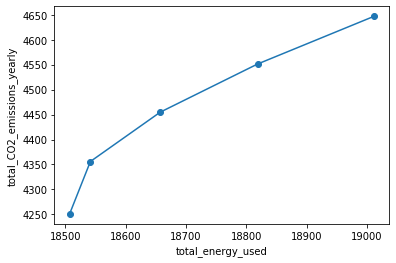

In [14]:
fig, ax = plt.subplots()  
ax.plot(total_floor_areas,total_CO2_emissions_yearlys,'-o')
ax.set_xlabel('total_energy_used')
ax.set_ylabel('total_CO2_emissions_yearly')